# Lab 1: Project dataset EDA and working with textual data

## Project dataset EDA

In this first lab session, you will be starting on the project by exploring the TripAdvisor dataset. Before you can start implementing and training any models on the dataset you need a thorough understanding of the data, its structure and what it is capable of. Therefore, you will be exploring the dataset to understand the datatypes of the attributes, their distribution and possible correlations. In your exploration you will find that a real world dataset, such as the TripAdvisor dataset, is far from '*clean*'. This means you will need to do **data cleaning** as well as other **preprocessing** steps before you can actually use the data and learn something from it. To get you started, scikit-learn has many options helper functions and documentation available for common data transformations such as: 
* categorical data encoding (https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
* discretization (https://scikit-learn.org/stable/modules/preprocessing.html#discretization)
* handling missing data (https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values)
* standardisation (https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)
* normalisation (https://scikit-learn.org/stable/modules/preprocessing.html#normalization)
* you can even implement your own custom transformer (https://scikit-learn.org/stable/modules/preprocessing.html#custom-transformers)

Furthermore, scikit-learn has useful features such as the ability to build an **pipeline** (https://scikit-learn.org/stable/modules/compose.html#) to chain together multiple preprocessing steps and models.

Processing textual data such as the restaurant descriptions and reviews requires some more attention. Therefore, at the end of this notebook, some techniques for working with textual data are introduced for you to experiment with.

## Task
Using the tools available and the suggested links in the introduction explore, clean, process and visualise the data. By doing so, you should have a better idea of the dataset. You can further explore some of the tasks about the data, such as:

* How does tripadvisor rank the restaurants? What category are the most correlated? 
* How is the price in tags ($) being calculated?
* Which correlation can be found between price category and the city of the restaurant?

Try to find more question you can ask yourself about the data that can give you more insights. <br>
Keep in mind that this dataset will be used for the project, try to think of the possible tasks while you go through the following steps.

### Get an initial feel of the data

First of all, take a look at your dataset. 
See what kind of data are provided in this dataset, and what kind of information is contained in the dataset.
What's the type of data? How are you going to use them?

*Hint: Pandas is a powerful tool to load and organize your data, try to load the dataset using pandas.*

In [145]:
# Import pandas and read csv using pandas

import pandas as pd
import seaborn as sn
import numpy as np

original_df = pd.read_csv("tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head(2)


,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727


As you can see, there are different types of data, numeric, bool, textual. <br>
Some columns contain multiply information. (e.g. tags contains price and cuisine style)
Some columns share the same information with other columns. (tags, cuisine style, and special diets or tags and price range) <br>
It is important to clean then up before you further process and analysis the data.

### Spliting the data
As explained in the introduction, the goal of machine learning is to build models on train data that are able to make predictions on unseen test data. So we first try to split our data into a trainset and a test set before we move on to the other steps.

In [146]:
from random import shuffle
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(original_df,test_size=0.2,train_size=0.8,shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2562 to 208
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1892 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1902 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1892 non-null   object 
 7   website url          1751 non-null   object 
 8   menu url             730 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1073 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null  

### Clean the data

Let's first deal with the numeric data.

*Hint 1: You can check data type with pandas easily.*

In [147]:
# decide which data should be numeric 
print("-"*20, "Dataset:", "-"*20)
print(df_train.info(), "\n")
# e.g. rank, general rating, number of reviews, food rating, service rating, value rating, atmosphere rating, price range

-------------------- Dataset: --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2562 to 208
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1892 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1902 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1892 non-null   object 
 7   website url          1751 non-null   object 
 8   menu url             730 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1073 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null 

In [148]:
df_train.head(1)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
2562,NaN,Gigi’s Retro Kitchen,-1.0 of 5 bubbles,0 reviews,Belgian|European,Deinze 9800 Belgium,+32 478 50 45 73,http://www.gigisretrokitchen.be/,NaN,False,info@gigisretrokitchen.be,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,"Belgian, European",NaN,NaN,NaN,21083578


In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2562 to 208
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1892 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1902 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1892 non-null   object 
 7   website url          1751 non-null   object 
 8   menu url             730 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1073 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null  

As it can be seen, the pandas' dataframe also stores the datatype of each columns. <br>
You can easily filter the data based on datatype.

In [150]:
# filter the data based on data types
numerics = ["int64","float64"]
df = df_train.select_dtypes(include=numerics)
print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2562 to 208
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   food rating        2064 non-null   float64
 1   service rating     2064 non-null   float64
 2   value rating       2064 non-null   float64
 3   atmosphere rating  2064 non-null   float64
 4   id                 2064 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 96.8 KB
None 



Now, you have a subset that contains columns with numeric data, take a look at the dataset by plotting the scatter plot and histogram.

array([[<AxesSubplot: xlabel='food rating', ylabel='food rating'>,
        <AxesSubplot: xlabel='service rating', ylabel='food rating'>,
        <AxesSubplot: xlabel='value rating', ylabel='food rating'>,
        <AxesSubplot: xlabel='atmosphere rating', ylabel='food rating'>,
        <AxesSubplot: xlabel='id', ylabel='food rating'>],
       [<AxesSubplot: xlabel='food rating', ylabel='service rating'>,
        <AxesSubplot: xlabel='service rating', ylabel='service rating'>,
        <AxesSubplot: xlabel='value rating', ylabel='service rating'>,
        <AxesSubplot: xlabel='atmosphere rating', ylabel='service rating'>,
        <AxesSubplot: xlabel='id', ylabel='service rating'>],
       [<AxesSubplot: xlabel='food rating', ylabel='value rating'>,
        <AxesSubplot: xlabel='service rating', ylabel='value rating'>,
        <AxesSubplot: xlabel='value rating', ylabel='value rating'>,
        <AxesSubplot: xlabel='atmosphere rating', ylabel='value rating'>,
        <AxesSubplot: xlabel=

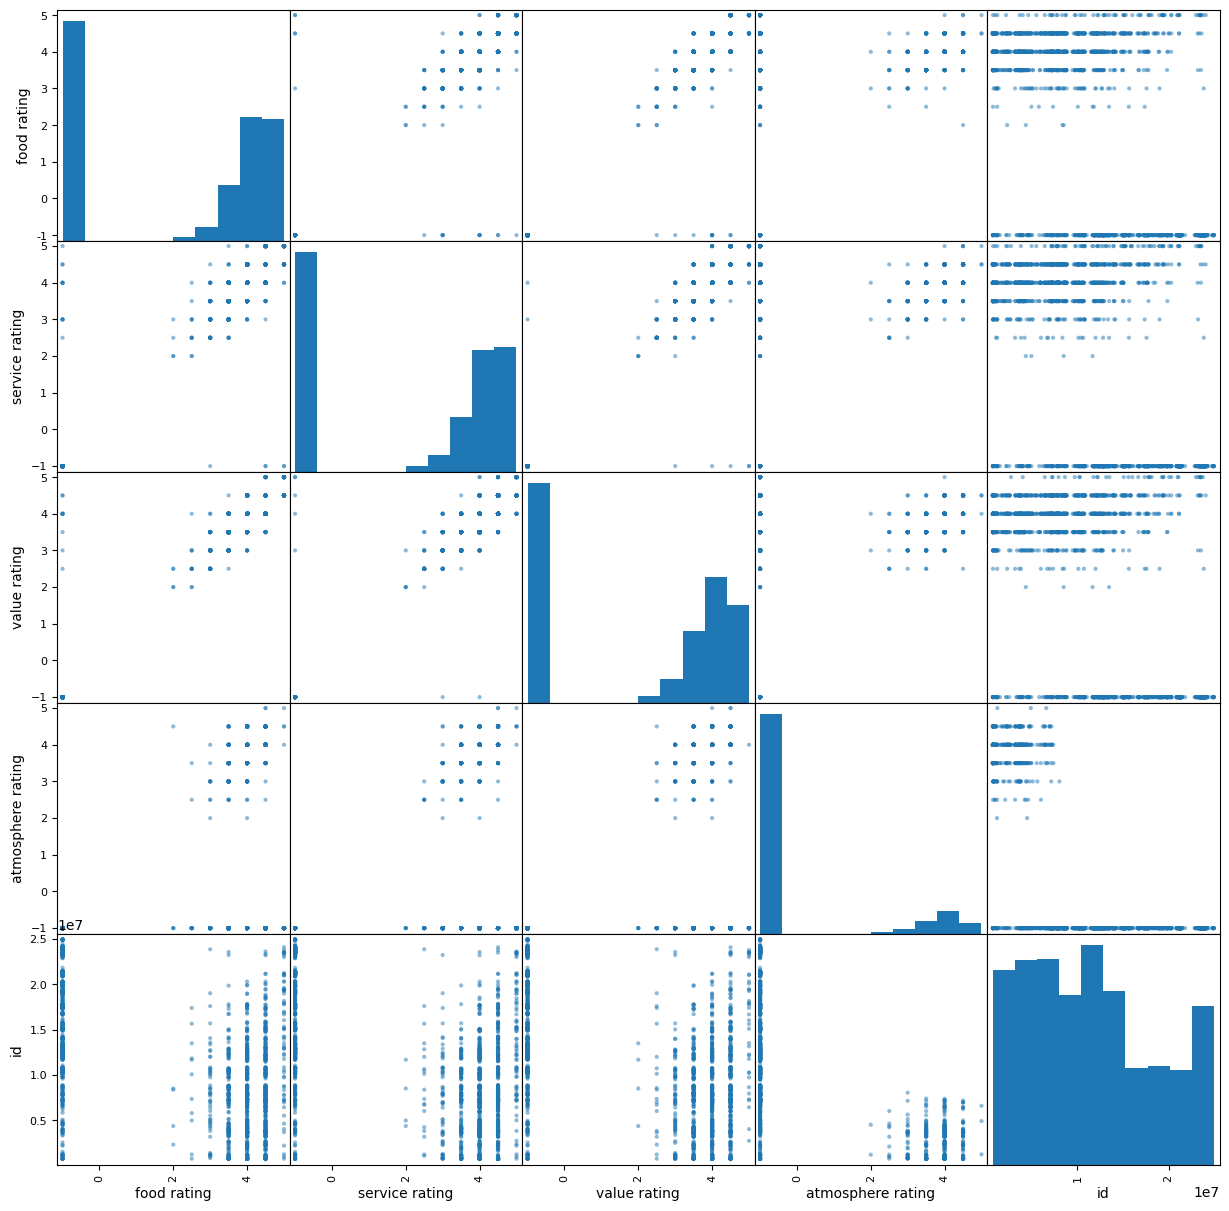

In [151]:
# visualize the histogram and scatter plot of the data
pd.plotting.scatter_matrix(df, figsize  = [15, 15])

Two problems can be spotted from the visualization.
1. Some of the data are not stored as numeric, e.g. general rating. <br> Find out why and how to numericize them.
2. Some columns contains *-1* in the histogram, what does it mean and what should you do?// atmosfeer , service rating, food rating, value rating


<AxesSubplot: >

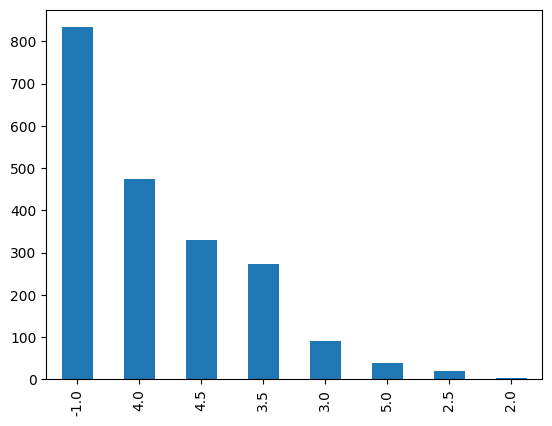

In [152]:
df_train["value rating"].value_counts().plot.bar()


<AxesSubplot: >

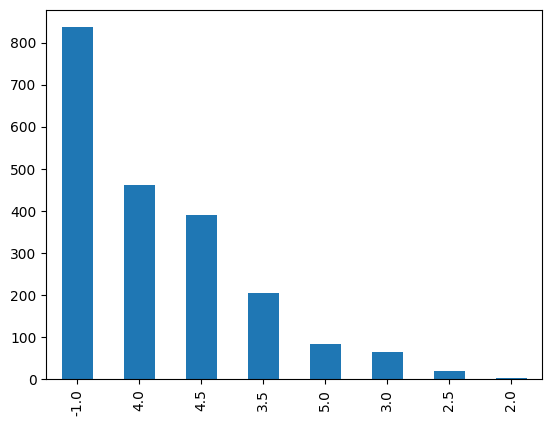

In [153]:
df_train["service rating"].value_counts().plot.bar()


<AxesSubplot: >

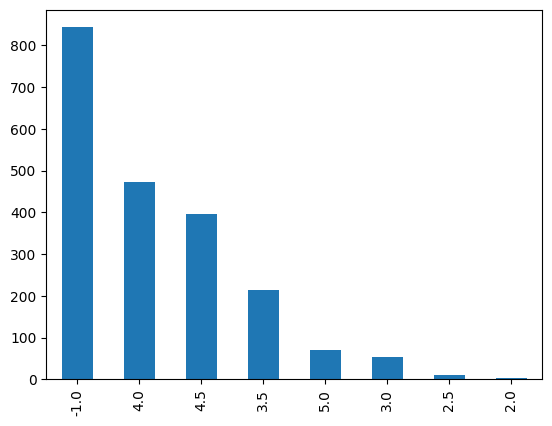

In [154]:
df_train["food rating"].value_counts().plot.bar()

<AxesSubplot: >

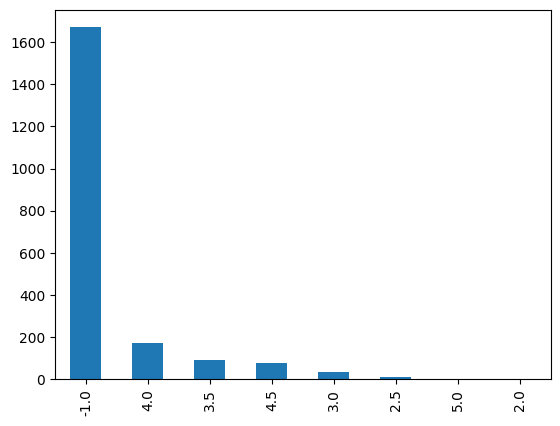

In [155]:
df_train["atmosphere rating"].value_counts().plot.bar()


from the charts above we can conclude that there are no (atmosphere/food/service/value) ratings of 0 so if needed, it is possible to map -1 to 0

In [156]:
# Check the each column and try to numericize rank, general rating, number of reviews
# rank
# df["rank"] = 

# # general rating
# df["general rating"] = ...

# # number of reviews
# df["number of reviews"] = ...

df["rank"]=df_train["rank"].str.replace("#","").astype(float)
df["general rating"]=df_train["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df["number of reviews"]=df_train["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

While some of the columns can easily be numericized, some columns need more processing. One example is the price range.
* Task: Check the data formation and numericize the price range

In [157]:
# price range
print('-'*20, "price range", '-'*20)
print(df_train["price range"])

-------------------- price range --------------------
2562    No pricing available
908     No pricing available
2445    No pricing available
1189               €20 - €41
589     No pricing available
                ...         
848                 €2 - €25
1264    No pricing available
2417                €5 - €17
2141    No pricing available
208     No pricing available
Name: price range, Length: 2064, dtype: object


As it can be seen, the price range column contains the lower bound and upper bound of the price.
Also that some of the price are not available.
* Task: How are you going to numericize the price range?

In [158]:
#check if we can use 0€ lower bound and upper bound values
# df_train["price range"][df_train["price range"]!="No pricing available"].map(lambda x: str(x).startswith("€0")).value_counts()
temp=df_train["price range"].str.replace("No pricing available","nan - nan").str.replace("€","").str.split("-",expand=True).rename(columns={0:"lower price",1:"upper price"})
df["lower_price"]=temp["lower price"].astype(float)
df["upper price"]=temp["upper price"].astype(float)
# df_train.drop(columns=["price range"],inplace=True)
#  value rating, atmosphere rating, price range
# df_train["rank"].astype(float)
# df_train.head(1)

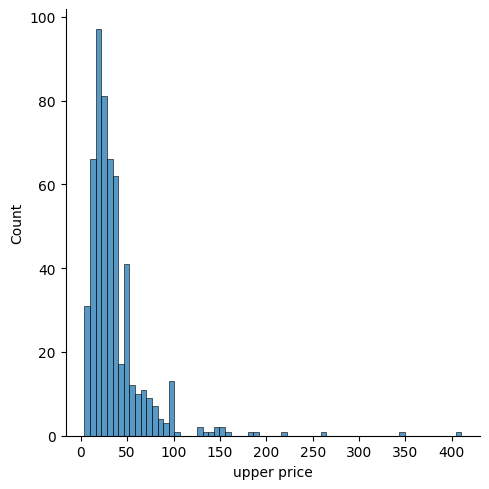

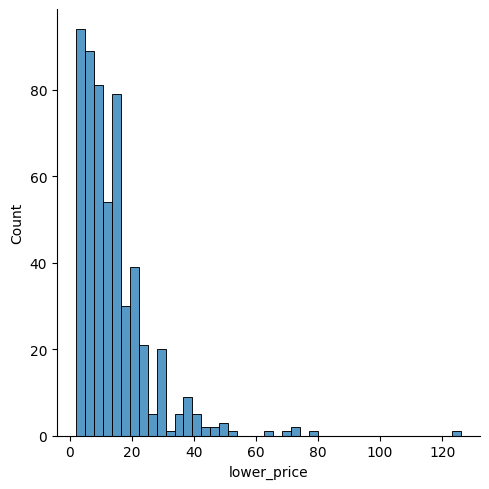

In [159]:
# Get the upper and lower bound of the price range and visualize the results
upper_bound = df["upper price"]

lower_bound = df["lower_price"]

sn.displot(upper_bound)
sn.displot(lower_bound)
# lower_bound.plot()

The price ranges variously. Considering the fact that there are not so much data avaiable, another way of processing the data is with discretization.
* Task: Dscretization the data

In [160]:
bins

array([  0.5 ,  20.85,  41.2 ,  61.55,  81.9 , 102.25, 122.6 , 142.95,
       163.3 , 183.65, 204.  ])

204.0
0.0
(0.0, 20.4]       487
(20.4, 40.8]       37
(40.8, 61.2]       14
(61.2, 81.6]        4
(81.6, 102.0]       1
(163.2, 183.6]      1
(183.6, 204.0]      1
(102.0, 122.4]      0
(122.4, 142.8]      0
(142.8, 163.2]      0
dtype: int64


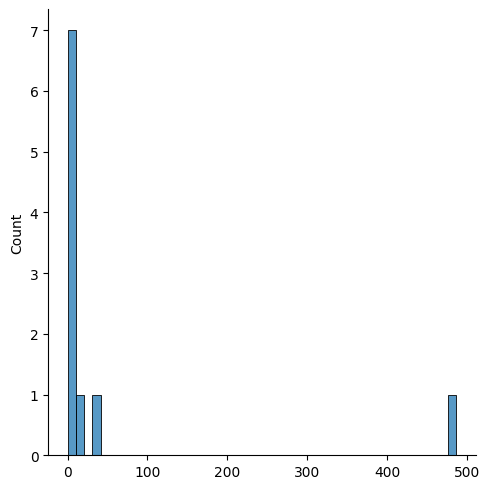

In [161]:
# You can quantify them by taking the mean of the price range or take the upper and lower bound

average = (upper_bound-lower_bound)/2

# discretization using pandas cut
avg_quantfied,bins = pd.cut(average,np.arange(average.min(),average.max()+1,(average.max()-average.min())/10),right=True,retbins=True)
print(average.max())
print(average.min())
#show the bin range
print(avg_quantfied.value_counts())

#visualize the data
sn.displot(avg_quantfied.value_counts())

df['price range'] = avg_quantfied#vervangen door midden van de bin waar de price range inzit

<AxesSubplot: >

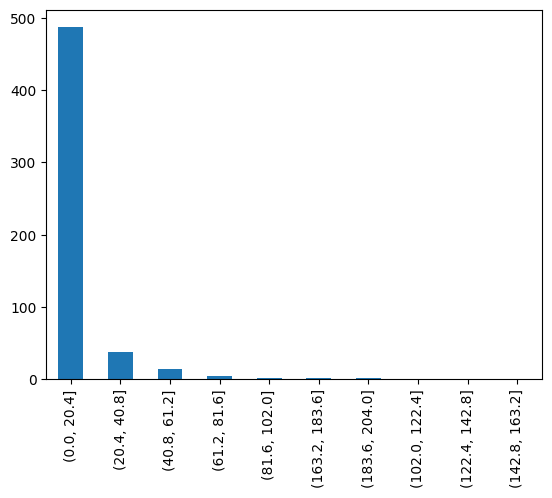

In [162]:
avg_quantfied.value_counts().plot.bar()

In [163]:
middens=[x.mid for x in df["price range"].cat.categories]
##denkn niet dat dit nuttig is maar we hebben de code

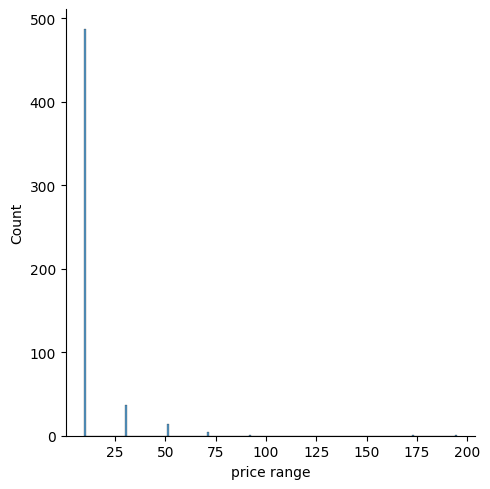

In [164]:
sn.displot(df["price range"].cat.rename_categories(middens))


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2562 to 208
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   food rating        2064 non-null   float64 
 1   service rating     2064 non-null   float64 
 2   value rating       2064 non-null   float64 
 3   atmosphere rating  2064 non-null   float64 
 4   id                 2064 non-null   int64   
 5   rank               1892 non-null   float64 
 6   general rating     2064 non-null   float64 
 7   number of reviews  2064 non-null   float64 
 8   lower_price        546 non-null    float64 
 9   upper price        546 non-null    float64 
 10  price range        545 non-null    category
dtypes: category(1), float64(9), int64(1)
memory usage: 179.8 KB


In [166]:
# You can quantify them by taking the mean of the price range or take the upper and lower bound

average = (upper_bound-lower_bound)/2

# discretization using pandas cut
# you can also try use sklearn
from sklearn import preprocessing
# transformer = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal').fit(np.array(average).reshape(-1,1))
# avg_quantfied = transformer.transform(np.array(average).reshape(-1,1))

# #show the bin range
# print(avg_quantfied)

# #visualize the data
# sn.displot(avg_quantfied[0])

# df['price range'] = avg_quantfied

Now draw the visualize the numeric data again to see if there's anything else to fix.

array([[<AxesSubplot: xlabel='food rating', ylabel='food rating'>,
        <AxesSubplot: xlabel='service rating', ylabel='food rating'>,
        <AxesSubplot: xlabel='value rating', ylabel='food rating'>,
        <AxesSubplot: xlabel='atmosphere rating', ylabel='food rating'>,
        <AxesSubplot: xlabel='id', ylabel='food rating'>,
        <AxesSubplot: xlabel='rank', ylabel='food rating'>,
        <AxesSubplot: xlabel='general rating', ylabel='food rating'>,
        <AxesSubplot: xlabel='number of reviews', ylabel='food rating'>,
        <AxesSubplot: xlabel='lower_price', ylabel='food rating'>,
        <AxesSubplot: xlabel='upper price', ylabel='food rating'>],
       [<AxesSubplot: xlabel='food rating', ylabel='service rating'>,
        <AxesSubplot: xlabel='service rating', ylabel='service rating'>,
        <AxesSubplot: xlabel='value rating', ylabel='service rating'>,
        <AxesSubplot: xlabel='atmosphere rating', ylabel='service rating'>,
        <AxesSubplot: xlabel='id', y

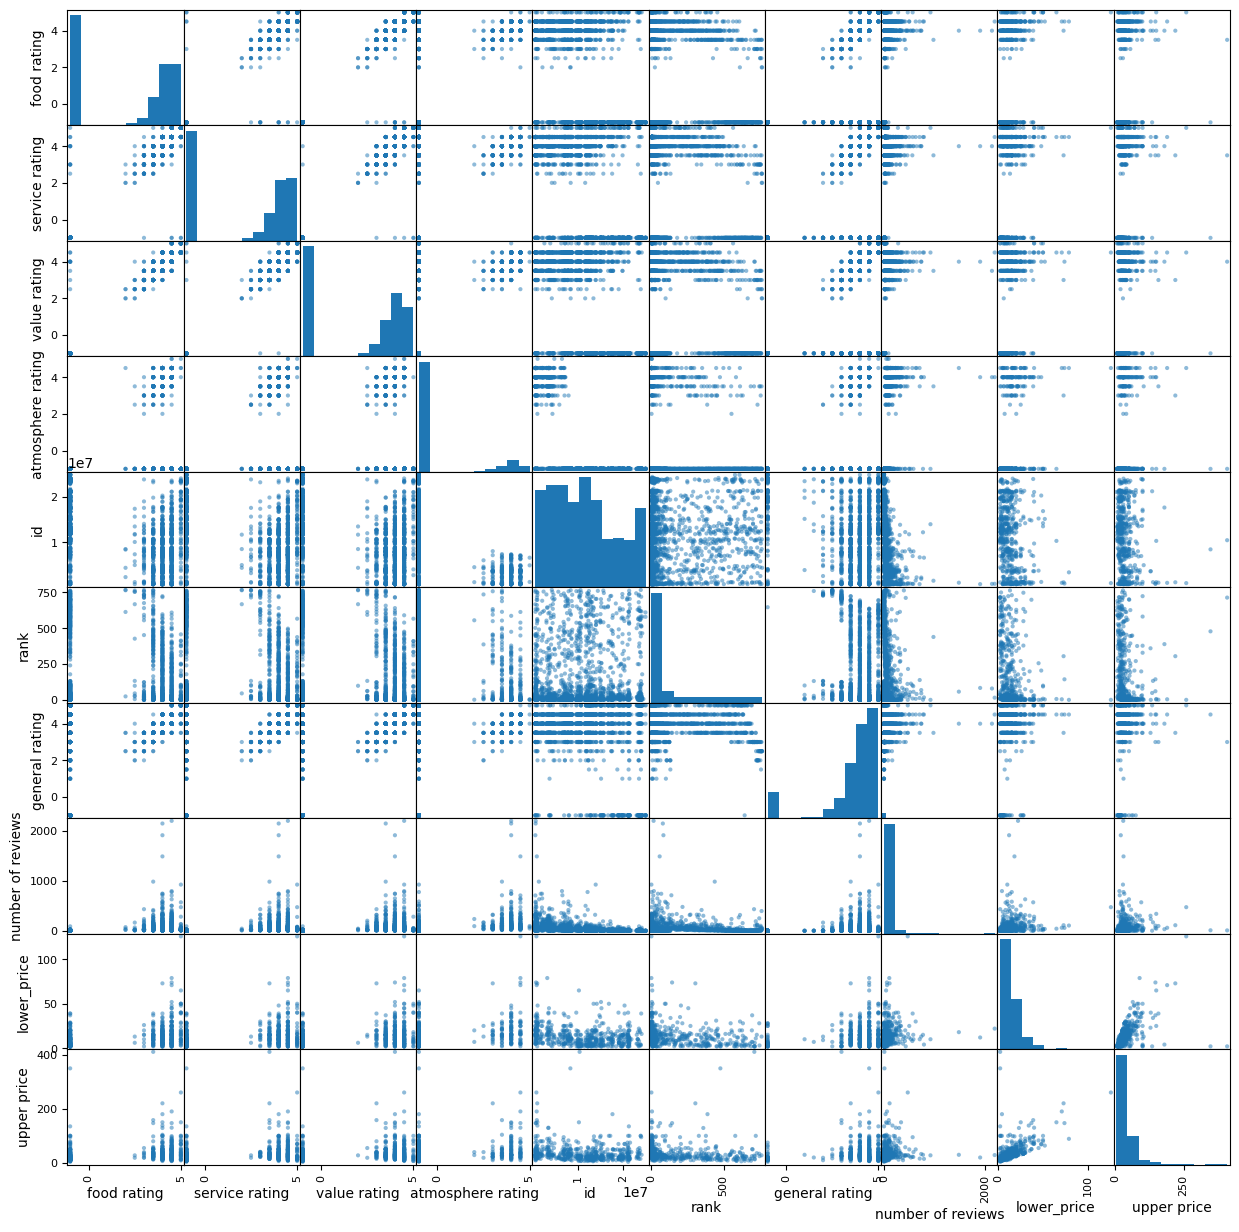

In [167]:
pd.plotting.scatter_matrix(df,figsize=[15,15])

The second quesion: Some columns contains -1 in the histogram, for some cases it stands for missing values. <br>
As mentioned in the lecture, some possible solutions are, droping the entries or attribute, or imputation.
* Under what condition should you drop the entries?// if you have a big enough dataset to not lose information
* Under what condition should you drop the attributes? //if they are redundant, give the same information as other attributes
* How can you imputation the missing value, how will it affects the data and further analysis?

In [168]:
df.replace(-1,np.nan).dropna()["food rating"].isna().value_counts()

False    141
Name: food rating, dtype: int64

In [169]:
import plotly.express as px
px.imshow(df.replace(-1,np.nan).isna(),title="Null Heatmap")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': array(['food rating', 'service rating', 'value rating', 'atmosphere rating',
                          'id', 'rank', 'general rating', 'number of reviews', 'lower_price',
                          'upper price', 'price range'], dtype=object),
              'xaxis': 'x',
              'y': array([2562,  908, 2445, ..., 2417, 2141,  208], dtype=int64),
              'yaxis': 'y',
              'z': array([[255, 255, 255, ..., 255, 255, 255],
                          [  0,   0,   0, ..., 255, 255, 255],
                          [255, 255, 255, ..., 255, 255, 255],
                          ...,
                          [255, 255, 255, ...,   0,   0,   0],
                          [255, 255, 255, ..., 255, 255, 255],
                          [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)}],
    'layout': {'coloraxis': {'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'template': '...',
               'title': {'text': 'Null Heatmap'},
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

as you can see, most of the null values are concentrated in theses 4 columns

array([[<AxesSubplot: xlabel='rank', ylabel='rank'>,
        <AxesSubplot: xlabel='general rating', ylabel='rank'>,
        <AxesSubplot: xlabel='number of reviews', ylabel='rank'>,
        <AxesSubplot: xlabel='food rating', ylabel='rank'>,
        <AxesSubplot: xlabel='service rating', ylabel='rank'>,
        <AxesSubplot: xlabel='value rating', ylabel='rank'>,
        <AxesSubplot: xlabel='atmosphere rating', ylabel='rank'>,
        <AxesSubplot: xlabel='id', ylabel='rank'>,
        <AxesSubplot: xlabel='lower_price', ylabel='rank'>,
        <AxesSubplot: xlabel='upper price', ylabel='rank'>],
       [<AxesSubplot: xlabel='rank', ylabel='general rating'>,
        <AxesSubplot: xlabel='general rating', ylabel='general rating'>,
        <AxesSubplot: xlabel='number of reviews', ylabel='general rating'>,
        <AxesSubplot: xlabel='food rating', ylabel='general rating'>,
        <AxesSubplot: xlabel='service rating', ylabel='general rating'>,
        <AxesSubplot: xlabel='value ratin

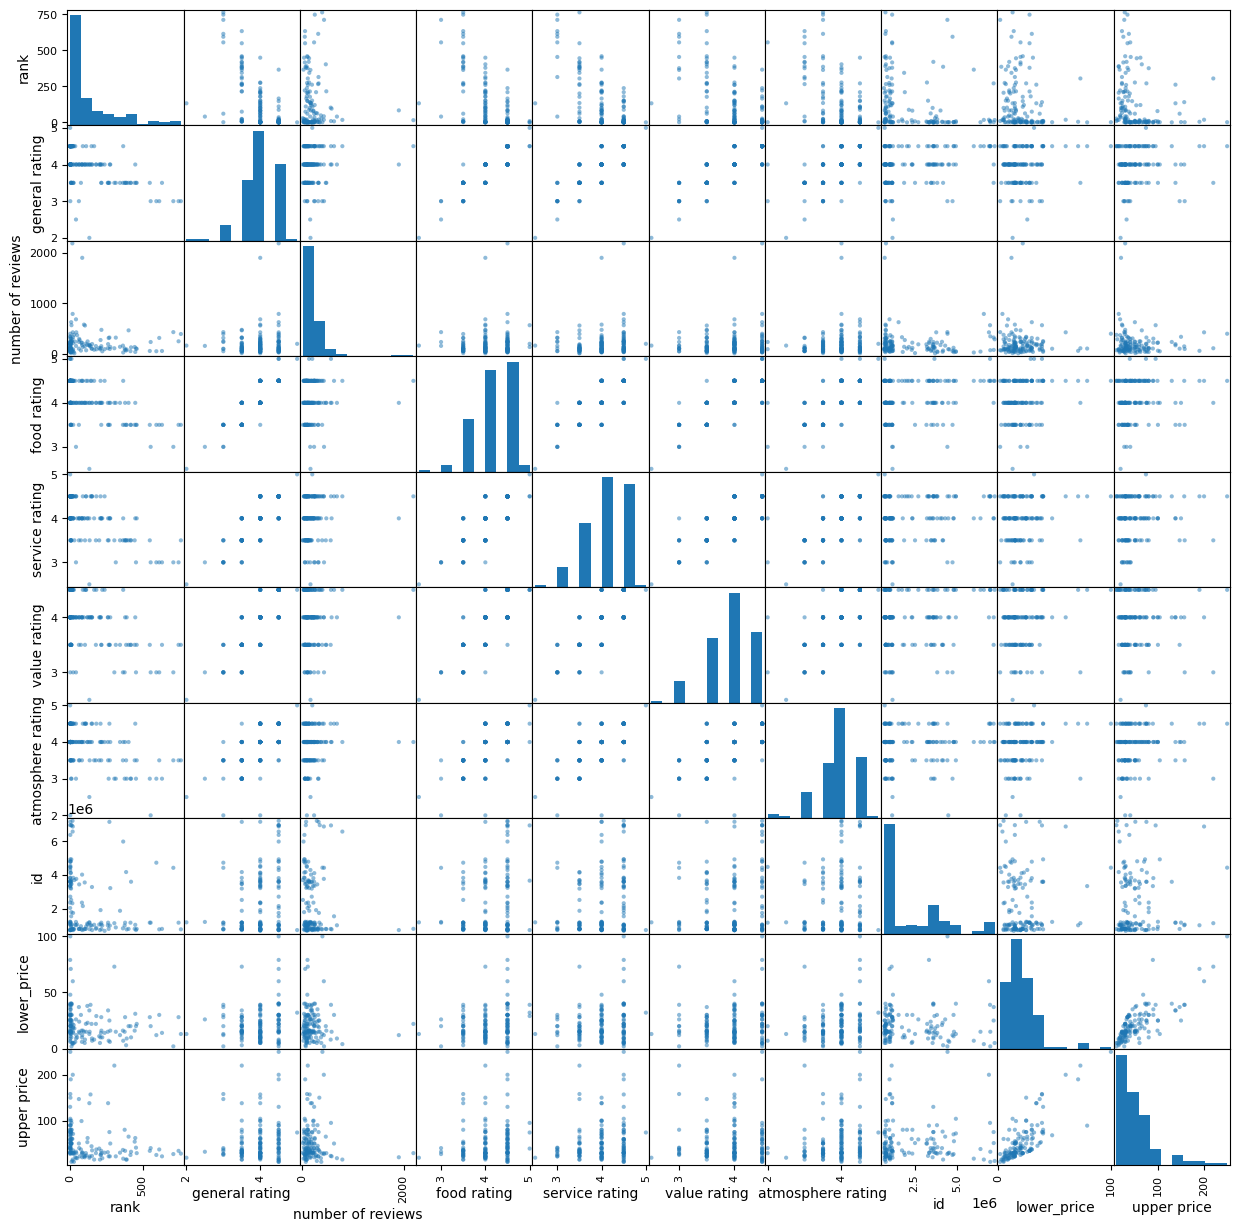

In [ ]:
# Visualise the data after dropping the entries
pd.plotting.scatter_matrix(df.replace(-1,np.nan).dropna(),figsize=[15,15])

Non-numeric columns may also contain rich information. <br>
These data can be encoded using different techniques, e.g. one-hot encoding, ordinal encoding. <br>
Take a look at the data, what types of data are suitable for ordinal encoding? What suits one-hot encoding more?
* Task: Encode data with these different coding method and then explain your choice.

In [173]:
df_train.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
2562,NaN,Gigi’s Retro Kitchen,-1.0 of 5 bubbles,0 reviews,Belgian|European,Deinze 9800 Belgium,+32 478 50 45 73,http://www.gigisretrokitchen.be/,NaN,False,info@gigisretrokitchen.be,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,"Belgian, European",NaN,NaN,NaN,21083578
908,#362,De Blauwe Kiosk,4.5 of 5 bubbles,18 reviews,$$ - $$$|French,"Kouter, Ghent 9000 Belgium",+32 496 51 95 60,http://www.deblauwekiosk.be/,http://www.deblauwekiosk.be/,True,info@deblauwekiosk.be,False,False,4.0,4.0,4.0,-1.0,NaN,NaN,No pricing available,French,NaN,NaN,Wheelchair Accessible,3730711


[array(['Aalst', 'Aalter', 'Adegem', 'Asper', 'Assenede', 'Astene',
       'Baarle', 'Bachte-Maria-Leerne', 'Balegem', 'Bazel', 'Bellem',
       'Belsele', 'Berchem', 'Berlare', 'Bevere', 'Beveren', 'Brakel',
       'Buggenhout', 'De', 'Deinze', 'Denderhoutem', 'Denderleeuw',
       'Dendermonde', 'Denderwindeke', 'Destelbergen', 'Deurle',
       'Dikkelvenne', 'Dries', 'Drongen', 'Edelare', 'Eeklo', 'Eke',
       'Elene', 'Elsegem', 'Erembodegem', 'Erondegem', 'Erpe-Mere',
       'Ertvelde', 'Evergem', 'Gavere', 'Geraardsbergen', 'Ghent',
       'Gijzegem', 'Grammene', 'Grotenberge', 'Haaltert', 'Haasdonk',
       'Hamme', 'Herzele', 'Heusden', 'Hoorebeke', 'Horebeke', 'Huise',
       'Kalken', 'Kallo', 'Kaprijke', 'Kemzeke', 'Kieldrecht',
       'Kluisbergen-Ruien', 'Knesselare', 'Kruibeke', 'Kruisem',
       'Kruishoutem', 'Kwaremont', 'Laarne', 'Lebbeke', 'Lede',
       'Ledeberg', 'Lembeke', 'Lierde', 'Lievegem', 'Lochristi',
       'Lokeren', 'Lotenhulle', 'Lovendegem', 'Lozer', 

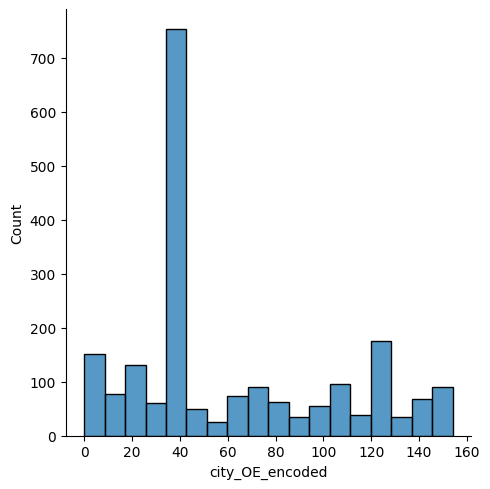

In [187]:
# ordinal encoding 
from sklearn.preprocessing import OrdinalEncoder


df['city'] = df_train["address"].str.split(', ').str[-1].str.split(" ").str[0]

# use skleanr for perform ordinal encoding and check the categories
enc = OrdinalEncoder()
enc.fit(np.array(df["city"]).reshape(-1,1))
df['city_OE_encoded']=enc.transform(np.array(df["city"]).reshape(-1,1))
print(enc.categories_)

# also visualize the results
sn.displot(df['city_OE_encoded'])

In [188]:
df.head()

,food rating,service rating,value rating,atmosphere rating,id,rank,general rating,number of reviews,lower_price,upper price,price range,city,city_OE_encoded
2562,-1.0,-1.0,-1.0,-1.0,21083578,NaN,-1.0,0.0,NaN,NaN,NaN,Deinze,19.0
908,4.0,4.0,4.0,-1.0,3730711,362.0,4.5,18.0,NaN,NaN,NaN,Ghent,41.0
2445,-1.0,-1.0,-1.0,-1.0,23706424,NaN,-1.0,0.0,NaN,NaN,NaN,Maldegem,77.0
1189,3.5,3.0,3.0,3.0,740676,454.0,3.5,109.0,20.0,41.0,"(0.0, 20.4]",Ghent,41.0
589,4.5,4.0,4.0,-1.0,11803061,4.0,4.0,45.0,NaN,NaN,NaN,Zele,146.0


### Correlations
Since you've already pre-processed quite some data, now you can easily look at the correlations between these features.
This can easily be done using seaborn (https://seaborn.pydata.org/).
* Try to show the correlation and draw a heatmap of the correlations.
* Think of the features that might correlates, look inside them and see if that's the case.

C:\Users\Raman\AppData\Local\Temp\ipykernel_12628\450064293.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



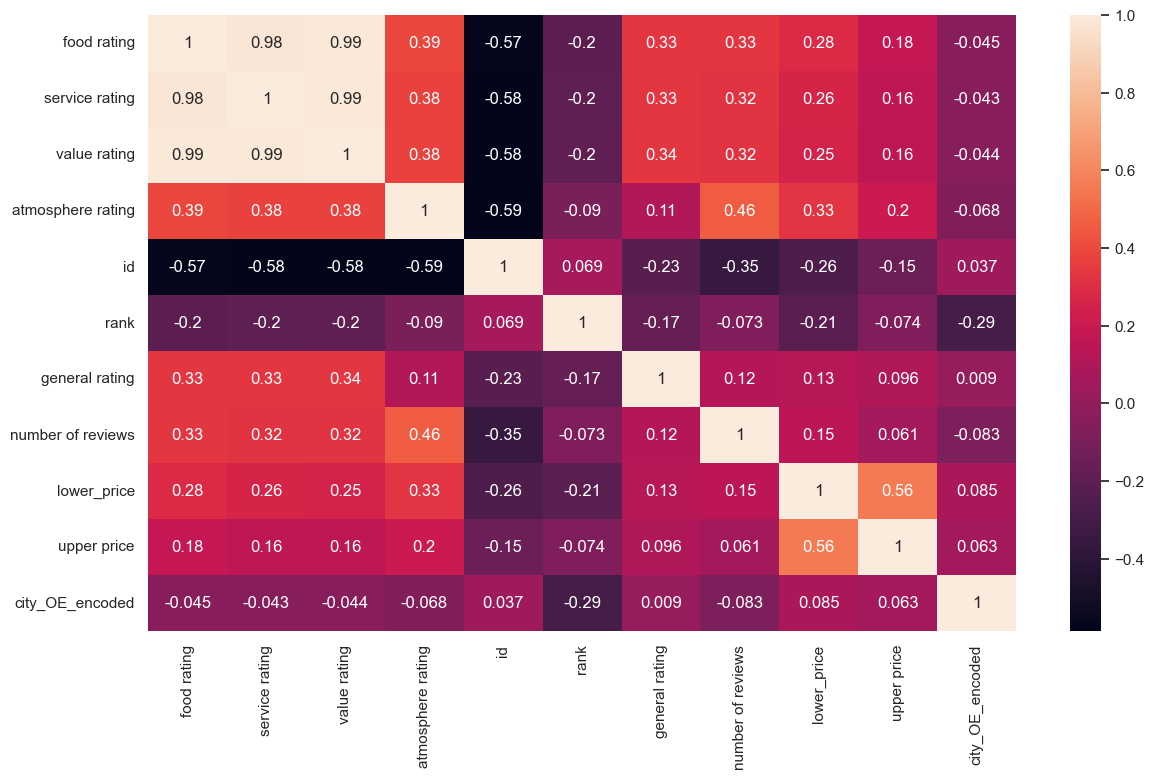

In [200]:
# Visualize the result for better interpretion 
# Hint: seaborn,  matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# Try to get the correlation against general rating
corr = df.corr()
# print(corr.sort_values(ascending=False).to_frame())

# Show the correlation as heat map to see the difference
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
heatmap = sns.heatmap(corr,annot=True)

Now that you have learnt most of the techniques of preprocessing data. <br>
Look into the rest of the dataset and think about how are you going to use these features to apply on your project.
* You can try to find the correlations between features and see if you can get some ideas from it.
* You can try to extract more features from tags or descriptions, and see decide how to encode them (onehot/ordinal).
* You can also try to use the pipline function of the scikit-learn (https://scikit-learn.org/stable/modules/compose.html#) to apply the previous techniques on other datasets, such as the testing set.

## Remarks
- We now get the initial idea about the data that we will used for the project.
- We should also learn the preprocessing, including how to turn these data into the form that we can easily use.
- While doing the preprocess, we also have a better idea of the distribution of the data, also the outliers. 
- We further learn the ways to deal with the missing data. Try think about the ways to fix missing data for different tasks?
- After the exploration, does the data fit your expectation about the project? Have you change your mind about the task you will develop in the project? 

## Feature extraction: Working with textual data

In the ideal scenario, data is available to you in tabular format. The rows represent individual datapoints and there is a column for each feature. This makes it easy for us to use it directly as input to a machine learning model that expects a matrix as input.

For many real world problems, you will need to first define and extract these features manually. In this exercise we will investigate how this can be done for textual data. Text data is a type of **unstructured data** since there is no predefined format for it. 

When working with textual data, you need to perform two steps prior to training an ML model **Data preprocessing** and **feature extraction**.

The preprocessing can include:
- **Tokenization**: converting sentences to words
- Removing unnecessary punctuation
- Removing urls, html markup, ...
- Removing **stop words**, frequent words such as "the", "is", "a", etc. that do not have specific semantic
- **Stemming**: words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.
- **Lemmatization**: Another approach to remove inflection by determining the part of speech and utilizing detailed database of the language.

The result of the preprocessing step is a list of words. We can use different approaches to extract features from these words to obtain numerical representations that we can give to machine learning models. The goal of this feature extraction step is to take a **document** (a collection of words) and to transform it into a numerical feature vector. The documents will vary in size but the feature vector usually has a fixed size. The collection of all documents is often called the **corpus** in text processing. We often use statistics of the corpus to obtain a feature representation for a single document.
- **Bag of Words (BOW)**: This is the simplest possible representation: We make the list of all the unique words in the text corpus, this is called the **vocabulary**. Then we can represent each document as a vector that indicates how many times each word from the vocabulary occurs in the document. This is a very simple method but can be useful in certain applications. In SPAM detection, we can expect that the words "stock", "Viagra", and "buy" can be indicative of SPAM emails. 
- A disadvantage is that this technique is only concerned with the occurrence of the word and not with the order of the words. It also treats each word independently.  You can solve this by introducing **n-gram generation** in the preprocessing step. n-grams are created by extracting all sequential n words from the document. **Bi-grams** for example extract all sequential pairs. The sentence "The president of the US is Joe Biden" will be transformed into \["The president", "president of", "of the", "the US", "US is", "is Joe", "Joe Biden"]. This is useful to capture terms consisting of multiple words. Bi-grams allow you to recognize both "Donald Trump" and "Donald Duck". Alternatively, you can also extract **tri-grams** (n=3).
- **TF-IDF**: shorthand for **term frequency-inverse document frequency**. Is a way of normalizing the BOW approach. It is the **term frequency** divided by the **document frequency**. Instead of just counting how many times a certain word occurs in the document (the term frequency) we divide it by the document frequency (the number of documents this word occurs in). A word that occurs often in a certain document but does not occur often in other documents is probably an important word for this document. 
- **Word embeddings**: Are the most advanced technique. A word embedding method transforms a word into a point in a high dimensional space where words that have a similar meaning are mapped to similar points. Word embeddings can be seen as a form of dimensionality reduction. This allows us to learn more complex relationships. The most common Word embedding technique is **Word2Vec**. It makes the assumption that two words that occur at a similar position in different sentences have more or less the same meaning. If you have the two sentences "BMW is a German car manufacturer" and "Tesla is an American automobile manufacturer", you can infer that "BMW" and "Tesla", "German" and "American" and "car" and "automobile" are related. Word embeddings are trained on a large text corpus such as wikipedia. You can find more information at https://pathmind.com/wiki/word2vec#import

## The data: Reviews from Tripadvisor
In the following exercise we will use TF-IDF to extract features from "Reviews from Tripadvisor". This is collected from the tripadvisor dataset, consisting the reviews for different restaurants. <br>
This could be the complementary of the "Tripadvisor Top Restaurants" dataset. 

*Hint: While you are learning the techniques, think about how the extracted data can be used for the project.*

Note: if some processing steps are very slow, it can help to temporarily experiment on a subset of the documents.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(...)#.head(5000)
print("Number of reviews in dataset: ",df.shape[0])
print(df.head(10))

<font color='red'>Task: Follow the instructions at https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html to preprocess the data and to extract TF-IDF features. Experiment with different ngrams and the *min_df* and *max_df* parameters. These last two parameters allow you to remove terms that are present in only a few documents or in most of the documents.</font>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer(
    ...
)

X_train_counts = ...

tf_transformer = TfidfTransformer()
X_train_tf = ...

<font color='red'>Task: How many features are extracted ? </font>

In [ ]:
feature_names=count_vect.get_feature_names_out()
print(feature_names[:10])

print(len(feature_names))
print(X_train_tf.shape)

In [ ]:
X_train_tf

<font color='red'>Task: Look at the first review, what keywords are extracted and what is their tf-idf score ? </font>

In [ ]:
print(df.at[0, "review"])
features = X_train_tf[0]

terms = pd.DataFrame(features.T.todense(), index=feature_names, columns=["tfidf"])
terms.sort_values(by=["tfidf"],ascending=False).head(n=10)

## Remarks
- We extracted the features from the text and used them to find similar reviews. In real applications you will use these features as input to a machine learning model for classification, clustering, regression, ...
- Since text documents are characterized by a large amount of features, it might be interesting to apply dimensionality reduction first. (see later theory lectures)
- TF-IDF and similar techniques are commonly used in search engines. For every document (webpage, product, ...). A TF-IDF vector is extracted that describes the content. All these vectors are stored in an **inverted index** that maps terms to documents. When the user executes a query, we just have to return the documents where a certain search term was found to be important.
- TF-IDF looks at words or pairs of words, this of course means that it depends on the language the text is written in. Be considate of this when having documents in multiple languages. Investigate how  you can handle this situation?
- TF-IDF is very commonly used but recently there has been much interest in **vector embedding** techniques such as word2vec, doc2vec, GloVe or fasttext. These models learn an **embedding space**. A lower dimensional space that words can be mapped to. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space. This has proven to be a very useful way to extract features from text.

# References

* Géron A., "Hands-on Machine Learnign with Scikit-Learn and Tensorflow. 2nd edition.
    